<a href="https://colab.research.google.com/github/chaitu2568/DEEP-LEARNING/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_points=100
centroids=[[-0.5,0.5],[0.5,-0.5]]
X,y=datasets.make_blobs(n_samples=n_points, random_state=123, centers=centroids, cluster_std=0.4)
x_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(100,1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0],X[y==0,1])
  plt.scatter(X[y==1, 0],X[y==1,1])

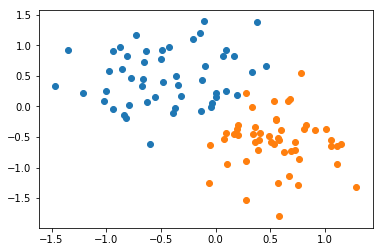

In [0]:
scatter_plot()

In [0]:
class Percep(nn.Module):
  def __init__(self,input,output):
    super().__init__()
    self.linear=nn.Linear(input,output)
  def forward(self,x):
    return torch.sigmoid(self.linear(x))
  def predict(self,x):
    if self.forward(x)>0.5:
      return 1
    else:
      return 0
  
    

In [0]:
torch.manual_seed(2)
obj=Percep(2,1)


In [0]:
[w,b]=obj.parameters()
w1,w2=w.view(2)
b1=b[0]
def get_params():
  return (w1.item(),w2.item(),b1.item())

In [0]:
def plot_fit(title):
  plt.title=title
#   0=w1*x1+w2*x2+b
  w1,w2,b=get_params()
  x1=np.array([-2.0,2.0])
  x2=w1*x1-b/(-w2)
  plt.plot(x1,x2,'g')
  scatter_plot()
  
  

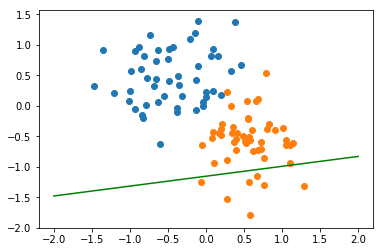

In [0]:
plot_fit('Initial plot')

In [0]:
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(obj.parameters(),lr=0.01)

In [0]:
iterations=1000
losses=[]
for i in range(iterations):
  y_pred=obj.forward(x_data)
  loss=criterion(y_pred,y_data)
  print('Iteration:',i,'Loss:',loss.item())
  losses.append(loss) 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Iteration: 0 Loss: 0.6185115575790405
Iteration: 1 Loss: 0.6174639463424683
Iteration: 2 Loss: 0.6164201498031616
Iteration: 3 Loss: 0.6153794527053833
Iteration: 4 Loss: 0.614342451095581
Iteration: 5 Loss: 0.6133086681365967
Iteration: 6 Loss: 0.6122783422470093
Iteration: 7 Loss: 0.6112515330314636
Iteration: 8 Loss: 0.6102280616760254
Iteration: 9 Loss: 0.6092080473899841
Iteration: 10 Loss: 0.6081910729408264
Iteration: 11 Loss: 0.6071775555610657
Iteration: 12 Loss: 0.606167733669281
Iteration: 13 Loss: 0.6051608920097351
Iteration: 14 Loss: 0.604157567024231
Iteration: 15 Loss: 0.6031574606895447
Iteration: 16 Loss: 0.602160632610321
Iteration: 17 Loss: 0.6011670827865601
Iteration: 18 Loss: 0.6001767516136169
Iteration: 19 Loss: 0.599189817905426
Iteration: 20 Loss: 0.5982059240341187
Iteration: 21 Loss: 0.5972254276275635
Iteration: 22 Loss: 0.5962479114532471
Iteration: 23 Loss: 0.5952739119529724
Iteration: 24 Loss: 0.5943028926849365
Iteration: 25 Loss: 0.5933352112770081
I

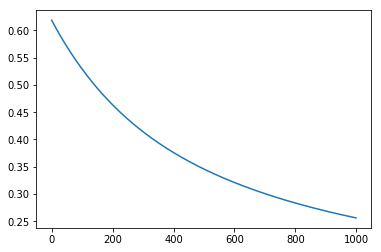

In [0]:
plt.plot(range(iterations),losses)
plt.show()

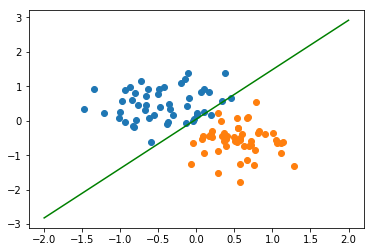

In [0]:
plot_fit('Perceptron')

Black point is with Positive Probabilty 0.9424158334732056
Red point is with Negative Probabilty 0.05055497586727142
black is in the class 1
red is in the class 0


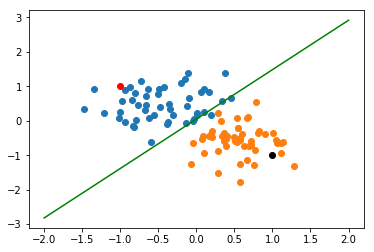

In [0]:
test1=torch.Tensor([1.0,-1.0])
test2=torch.Tensor([-1.0,1.0])
plt.plot(test1.numpy()[0],test1.numpy()[1],'ko')
plt.plot(test2.numpy()[0],test2.numpy()[1],'ro')
print('Black point is with Positive Probabilty {}'.format(obj.forward(test1).item()))
print('Red point is with Negative Probabilty {}'.format(obj.forward(test2).item()))
print('black is in the class {}'.format(obj.predict(test1)))
print('red is in the class {}'.format(obj.predict(test2)))
plot_fit('Perceptron')